In [1]:
%load_ext autoreload
%autoreload 1
%aimport utils
from utils import *
import os
from IPython import display
%matplotlib inline

# Question 1

In [2]:
print read_params()

&dat
 params%flx_scheme=1,
 params%timestep_scheme=1,
 params%nx=50,
 params%p_exit_ratio=0.72,
 params%eps=0.2,
 params%tol=1e-15,
 params%max_iter=100000,
 params%cfl=0.1/



In [18]:
def savefig(fig, name):
    filepath = 'tex/figs/%s.pdf' % name
    fig.save(filepath)

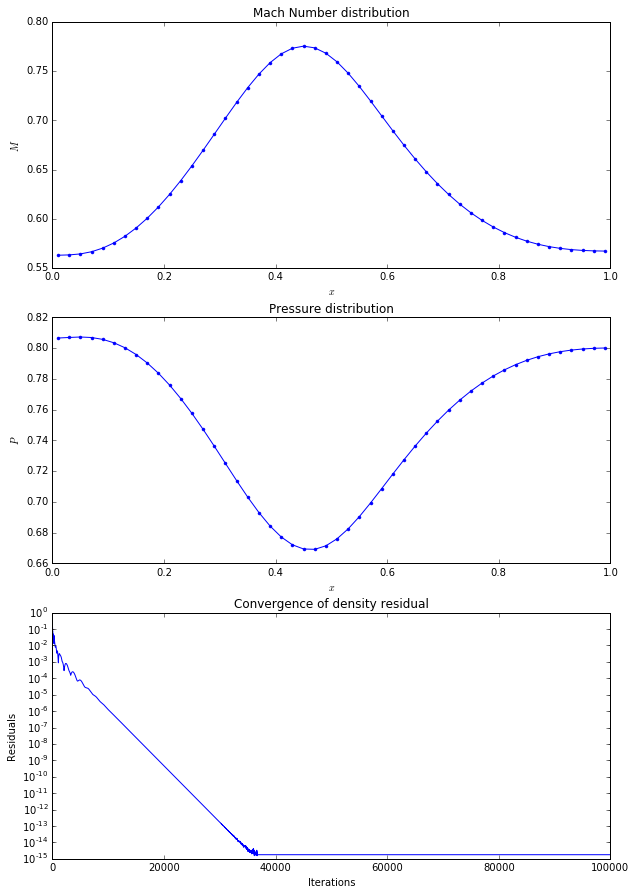

In [20]:
def q1():
    modify_param('flx_scheme', 1)
    modify_param('timestep_scheme', 1)
    modify_param('max_iter', 100000)
    modify_param('p_exit_ratio', 0.8)
    modify_param('nx', 50)
    modify_param('eps', 0.30)
    modify_param('cfl', 0.2)
    run()
    state, resi, time = read_data()
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 15))
    plot_mach(state, ax1)
    plot_pressure(state, ax2)
    plot_residual(resi, ax3)
    
q1()

# Question 2 - Exit Pressure Study

In [4]:
def pressure_study(p_exit_ratio, eps):
    modify_param('flx_scheme', 1)
    modify_param('timestep_scheme', 1)
    modify_param('max_iter', 100000)
    modify_param('nx', 100)
    modify_param('p_exit_ratio', p_exit_ratio)
    modify_param('eps', eps)
    run()
    title_extra = '\nratio=%.2f' % p_exit_ratio
    state, resi, time = read_data()
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 15))
    plot_pressure(state, ax1, title_extra)
    plot_mach(state, ax2)
    plot_residual(resi, ax3, title_extra)

In [5]:
q2_params = {
    'flx_scheme': 1,
    'timestep_scheme': 1,
    'max_iter': 100000,
    'nx': 50,
}

Enter EPS: 0.05


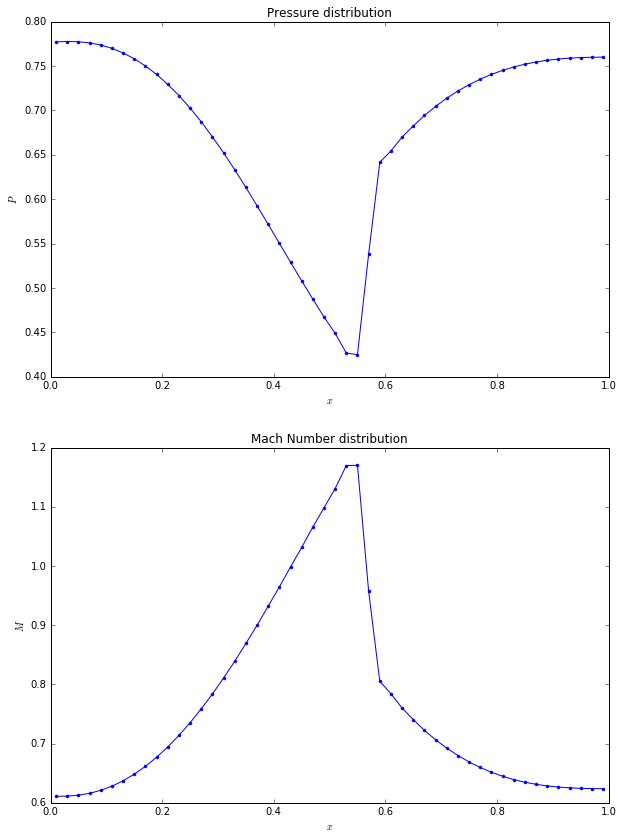

In [17]:
def q2_test():
    """Used to look for correct epsilon value"""
    for k, v in q2_params.items():
        modify_param(k, v)
    
    modify_param('p_exit_ratio', 0.76)
    eps = float(raw_input('Enter EPS: '))
    modify_param('eps', eps)
    run()
    state, resi, time = read_data()
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 14))
    plot_pressure(state, ax1)
    plot_mach(state, ax2)
    
q2_test()

Enter eps > 0.2


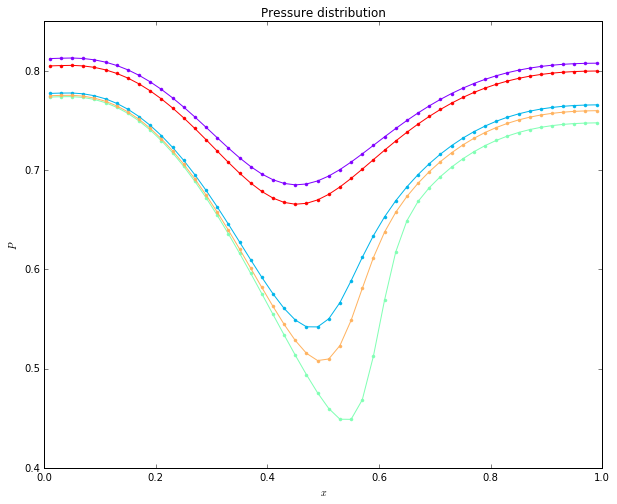

Enter eps > 0.25


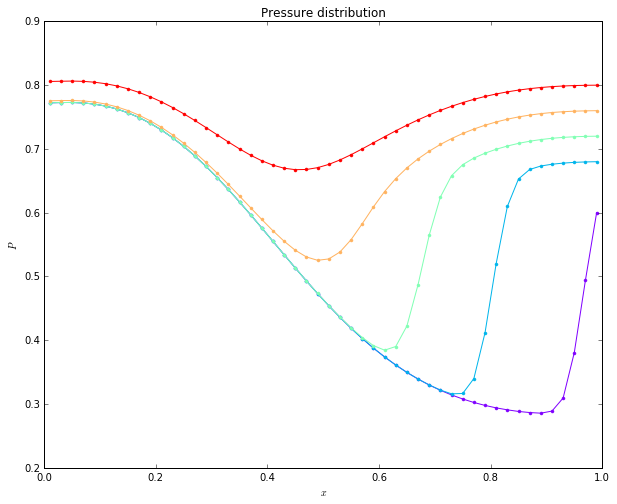

Enter eps > 0.3


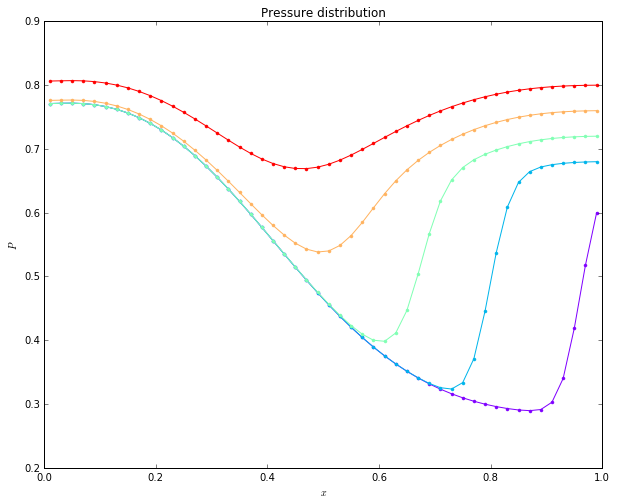

Enter eps > 0.8


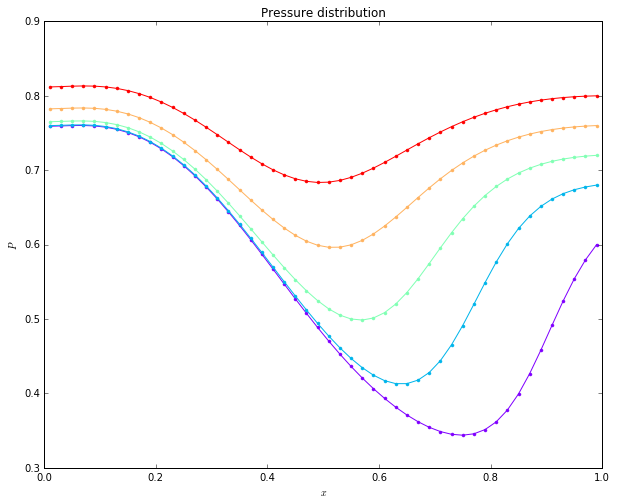

Enter eps > 0.21


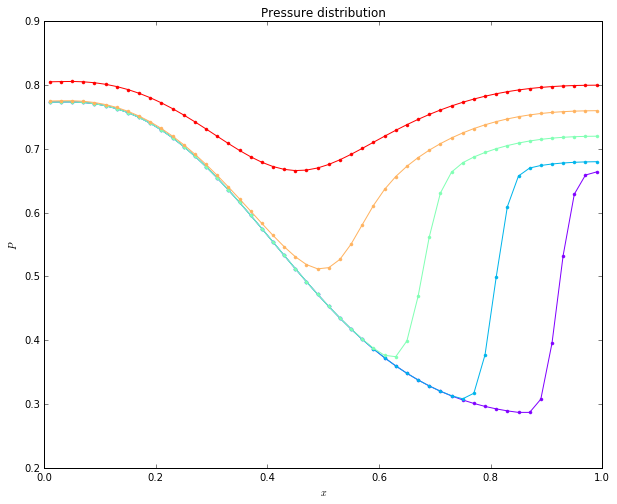

Enter eps > 0.15


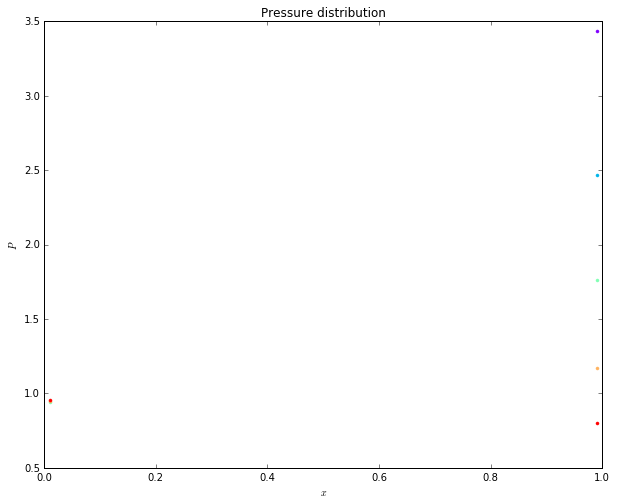

Enter eps > 0.205


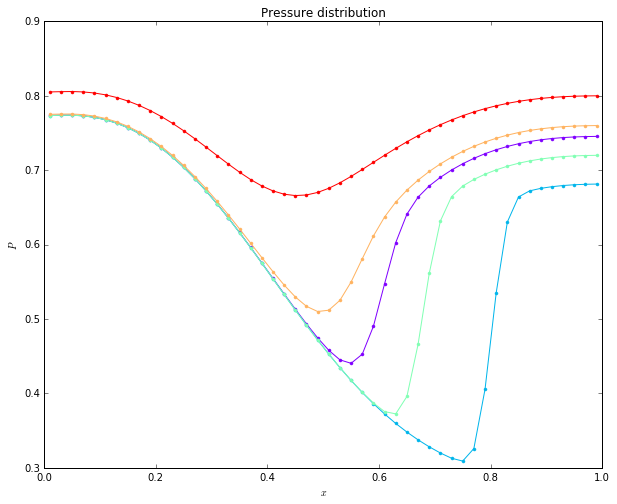

Enter eps > 0.22


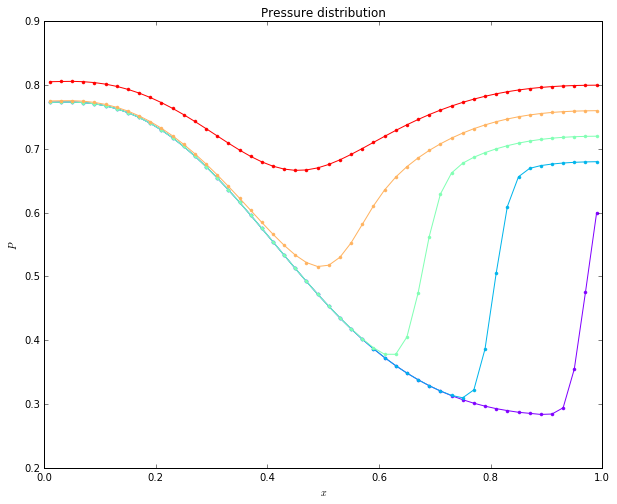

Enter eps > 0.215


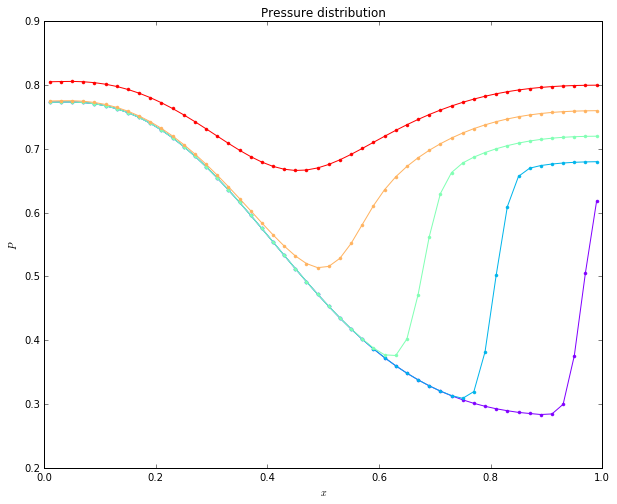

Enter eps > 0.211


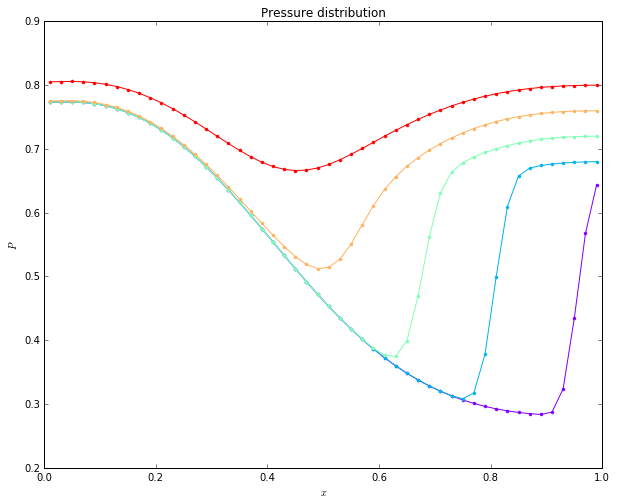

Enter eps > 0.218


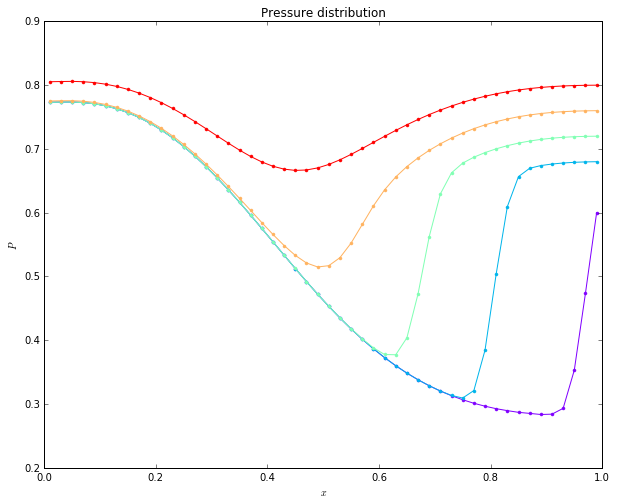

In [ ]:
def q2():
    pratios = [0.6, 0.68, 0.72, 0.76, 0.8]
colors = mk_rainbow(pratios)
while True:
    eps = raw_input('Enter eps > ')
    if eps is '':
        break
    eps = float(eps)
    modify_param('eps', eps)
    fig, ax = plt.subplots(figsize=(10, 8))
    for color, pratio in zip(colors, pratios):
        modify_param('p_exit_ratio', pratio)
        out = run()
        state, resi, time = read_data()
        plot_pressure(state, ax, color=color)
    fig.canvas.draw()
    plt.show()
    

---
# Question 3 - Grid Study

In [73]:
def calc_ptot_out(state):
    

def q3(nx):
    modify_param('max_iter', 200000)
    modify_param('p_exit_ratio', 0.72)
    modify_param('eps', 0.3)
    modify_param('nx', nx)
    run()
    title_extra = '\nnx=%d' % nx
    state, resi, time = read_data()
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 15))
    plot_residual(resi, ax1, title_extra)
    plot_mach(state, ax2)
    plot_pressure(state, ax3, title_extra)

In [74]:
# grid_study(25)

In [75]:
# grid_study(50)

In [76]:
# grid_study(100)

In [77]:
# grid_study(200)

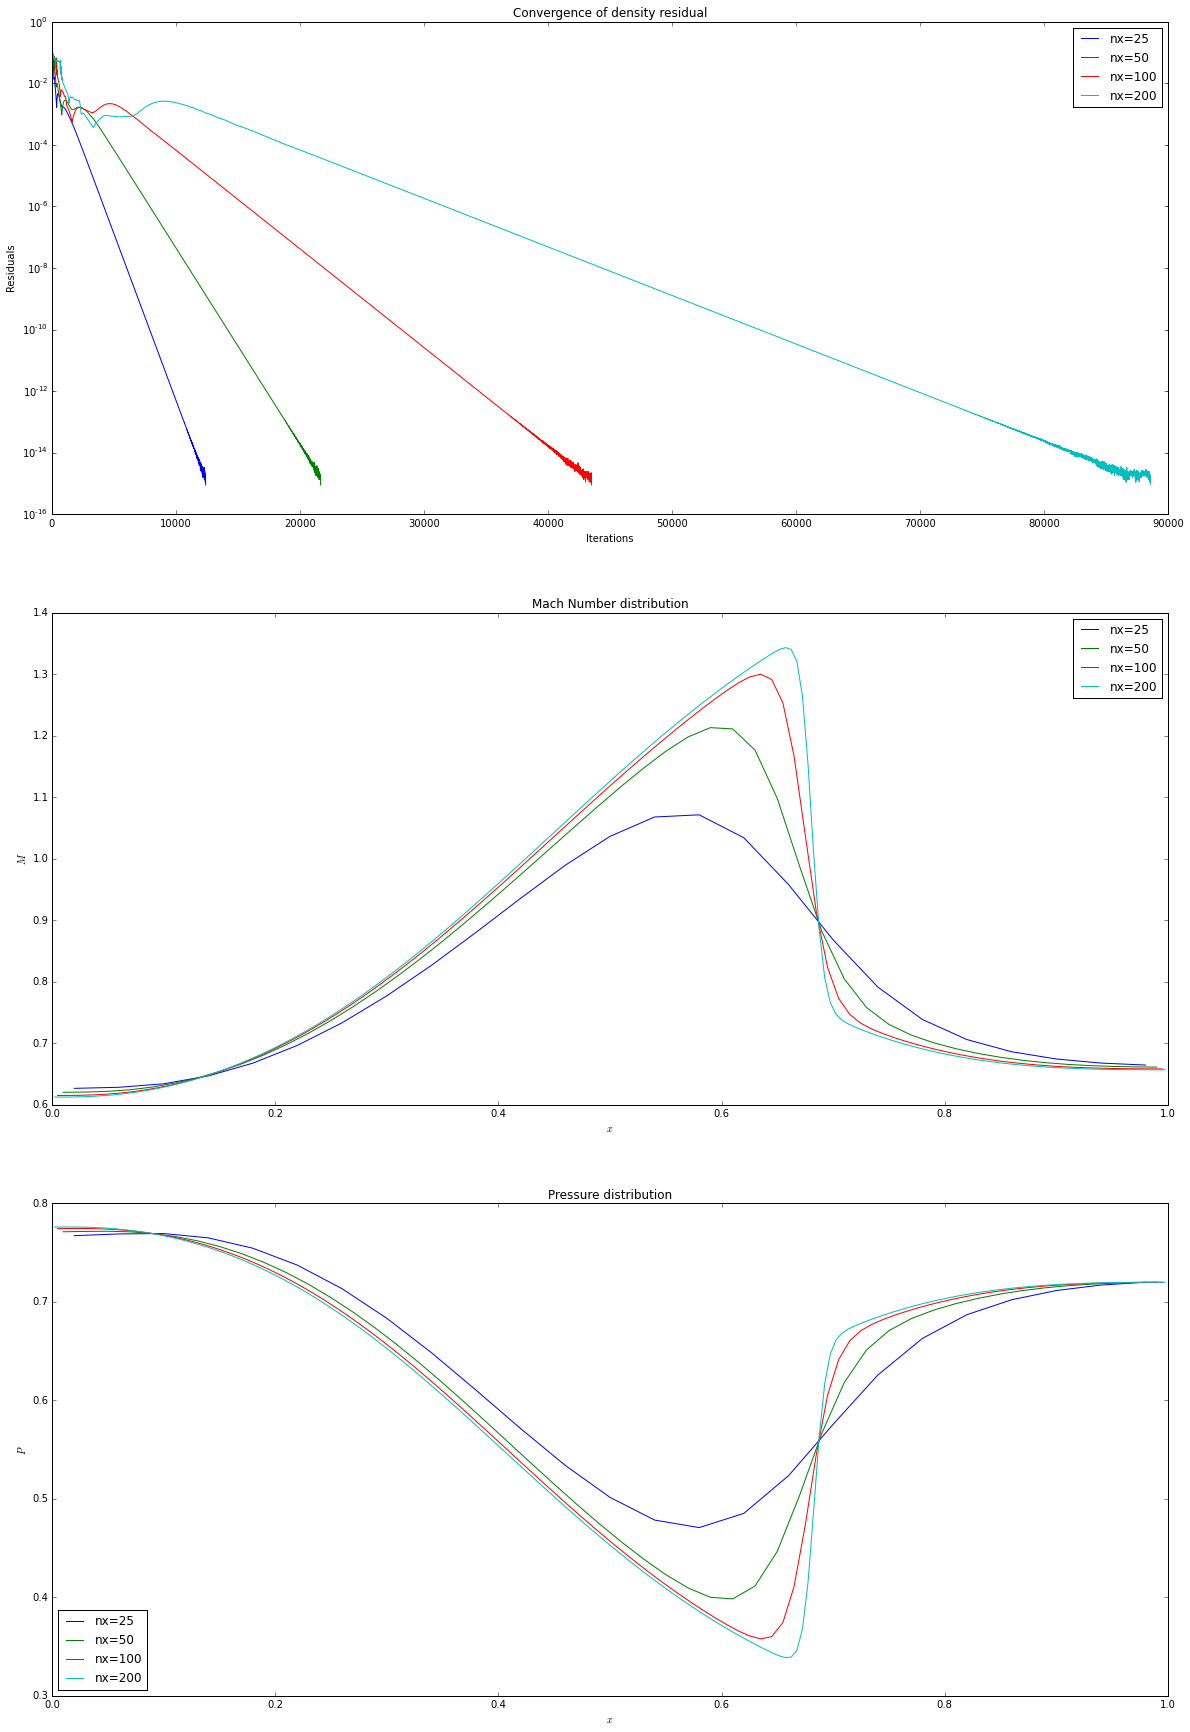

In [78]:
opt = {'marker': None}
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20, 30))
results = []
nxs = [25, 50, 100, 200]
for i, nx in enumerate(nxs):
    modify_param('nx', nx)
    _=run()
    state, resi, time = read_data()
    plot_residual(resi, ax1, label='nx=%d' % nx, **opt)
    plot_mach(state, ax2, label='nx=%d' % nx, **opt)
    plot_pressure(state, ax3, label='nx=%d' % nx, **opt)
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
plt.show()

### Discussion
Refining the mesh takes more iterations, but a mesh too coarse cannot capture the shock adequately.

However, the solutions seem to be converging towards a mesh-independent solution.

---
# Question 4 - Spatial Discretization Scheme Study

/home/selimb/miniconda2/envs/science/lib/python2.7/site-packages/matplotlib/scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


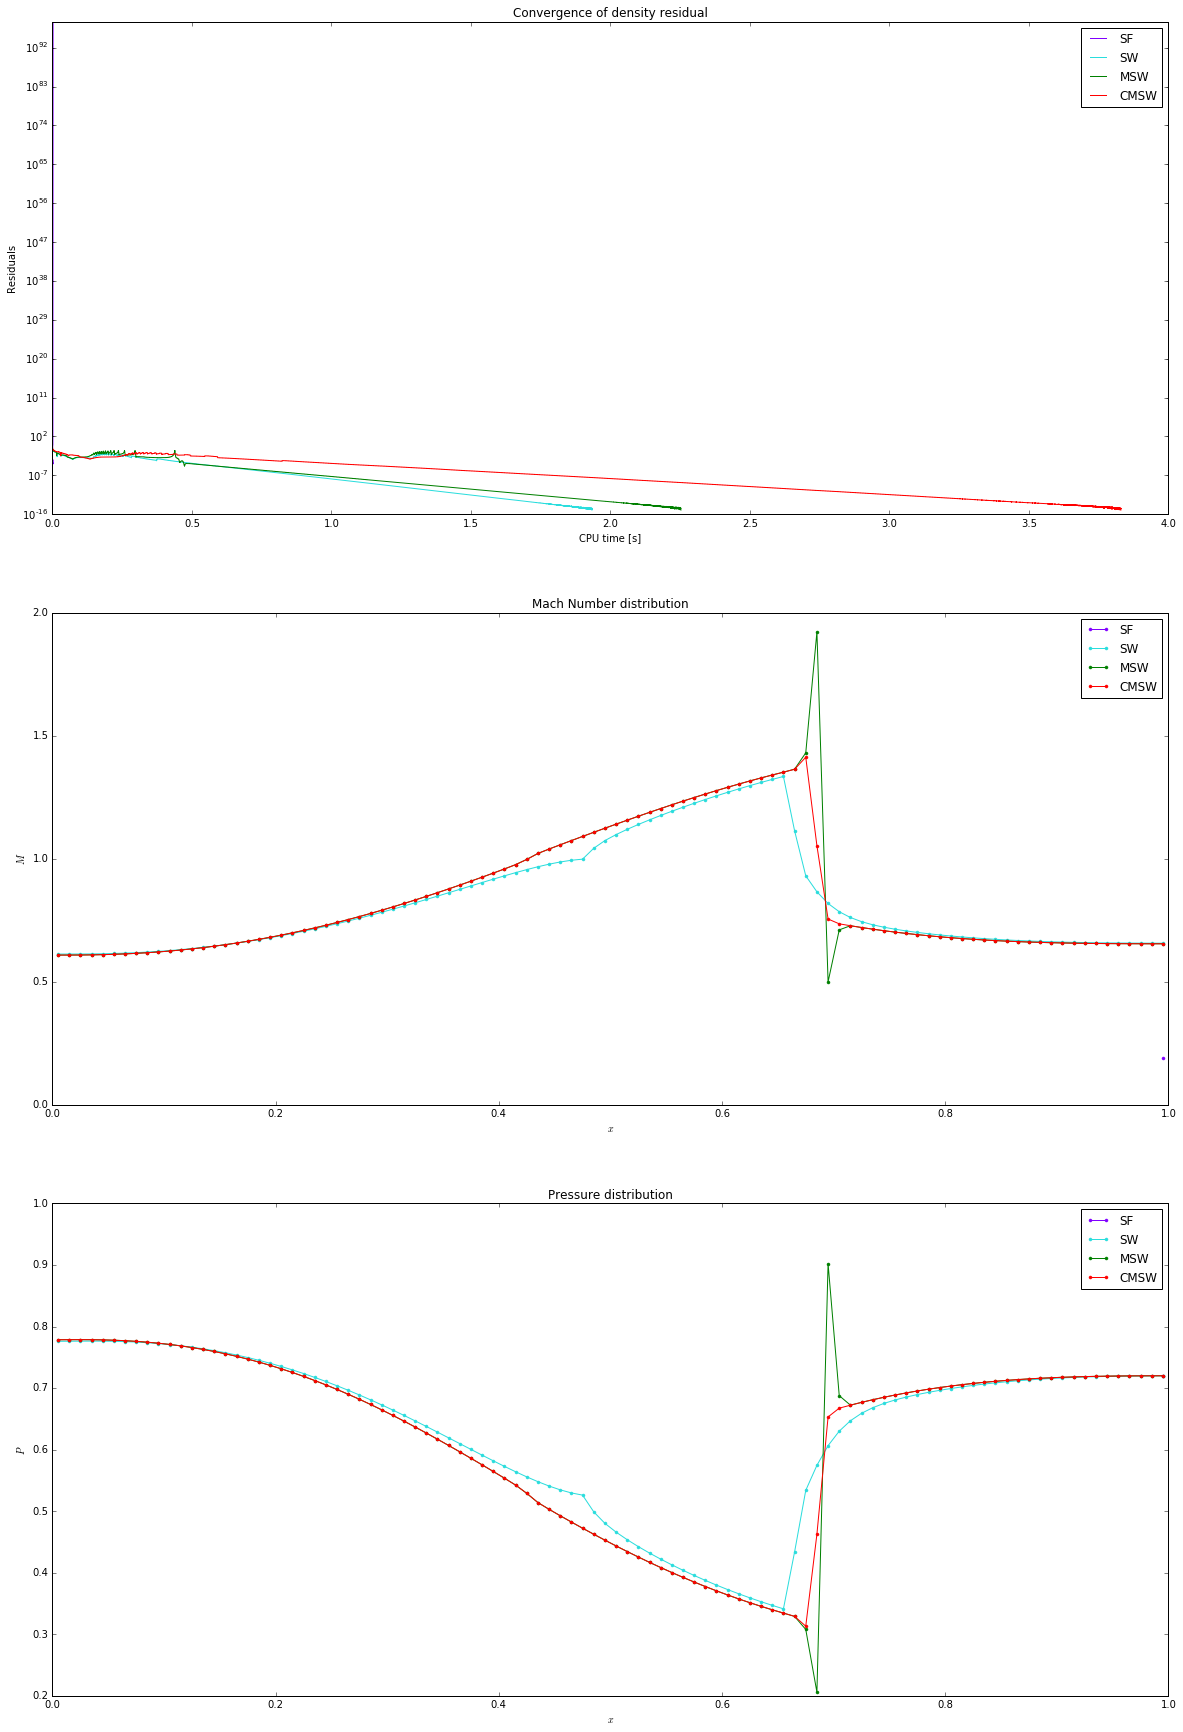

In [28]:
def q4():
    modify_param('timestep_scheme', 1)
    modify_param('max_iter', 100000)
    modify_param('nx', 100)
    modify_param('eps', 0.1)
    modify_param('p_exit_ratio', 0.72)
    flx_schemes = [
        (1, 'SF'),
        (2, 'SW'),
        (3, 'MSW'),
        (4, 'CMSW'),
    ]
#     linestyle = 'dashed'
#     styles = [linestyle, linestyle, ':', linestyle]
    # opt = {'marker': None, 'linestyle': linestyle}
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20, 30))
    results = []
    colors = mk_rainbow(flx_schemes)
    colors[2] = 'g'
    for i, flx_scheme in flx_schemes:
        modify_param('flx_scheme', i)
        run()
        state, resi, time = read_data()
#         opt['linestyle'] = styles[i-1]
        color = colors[i-1]
        plot_residual_time(resi, time, ax1, label='%s' % flx_scheme, color=color)
        plot_mach(state, ax2, label='%s' % flx_scheme, color=color)
        plot_pressure(state, ax3, label='%s' % flx_scheme, color=color)
    ax1.legend(loc='best')
    ax2.legend(loc='best')
    ax3.legend(loc='best')
    plt.show()
    
q4()

### Discussion

Indeed, MSW does not contain enough dissipation in the region of discontinuity -- it is greatly amplified. CMSW corrects for that and provides a more realistic behavior. However, it requires the most time. 

The Scalar Dissipation is the most dissipative of all.

----
# Question 5 - Temporal Discretization Scheme Study

## With Corrected-Modified-Steger-Warming

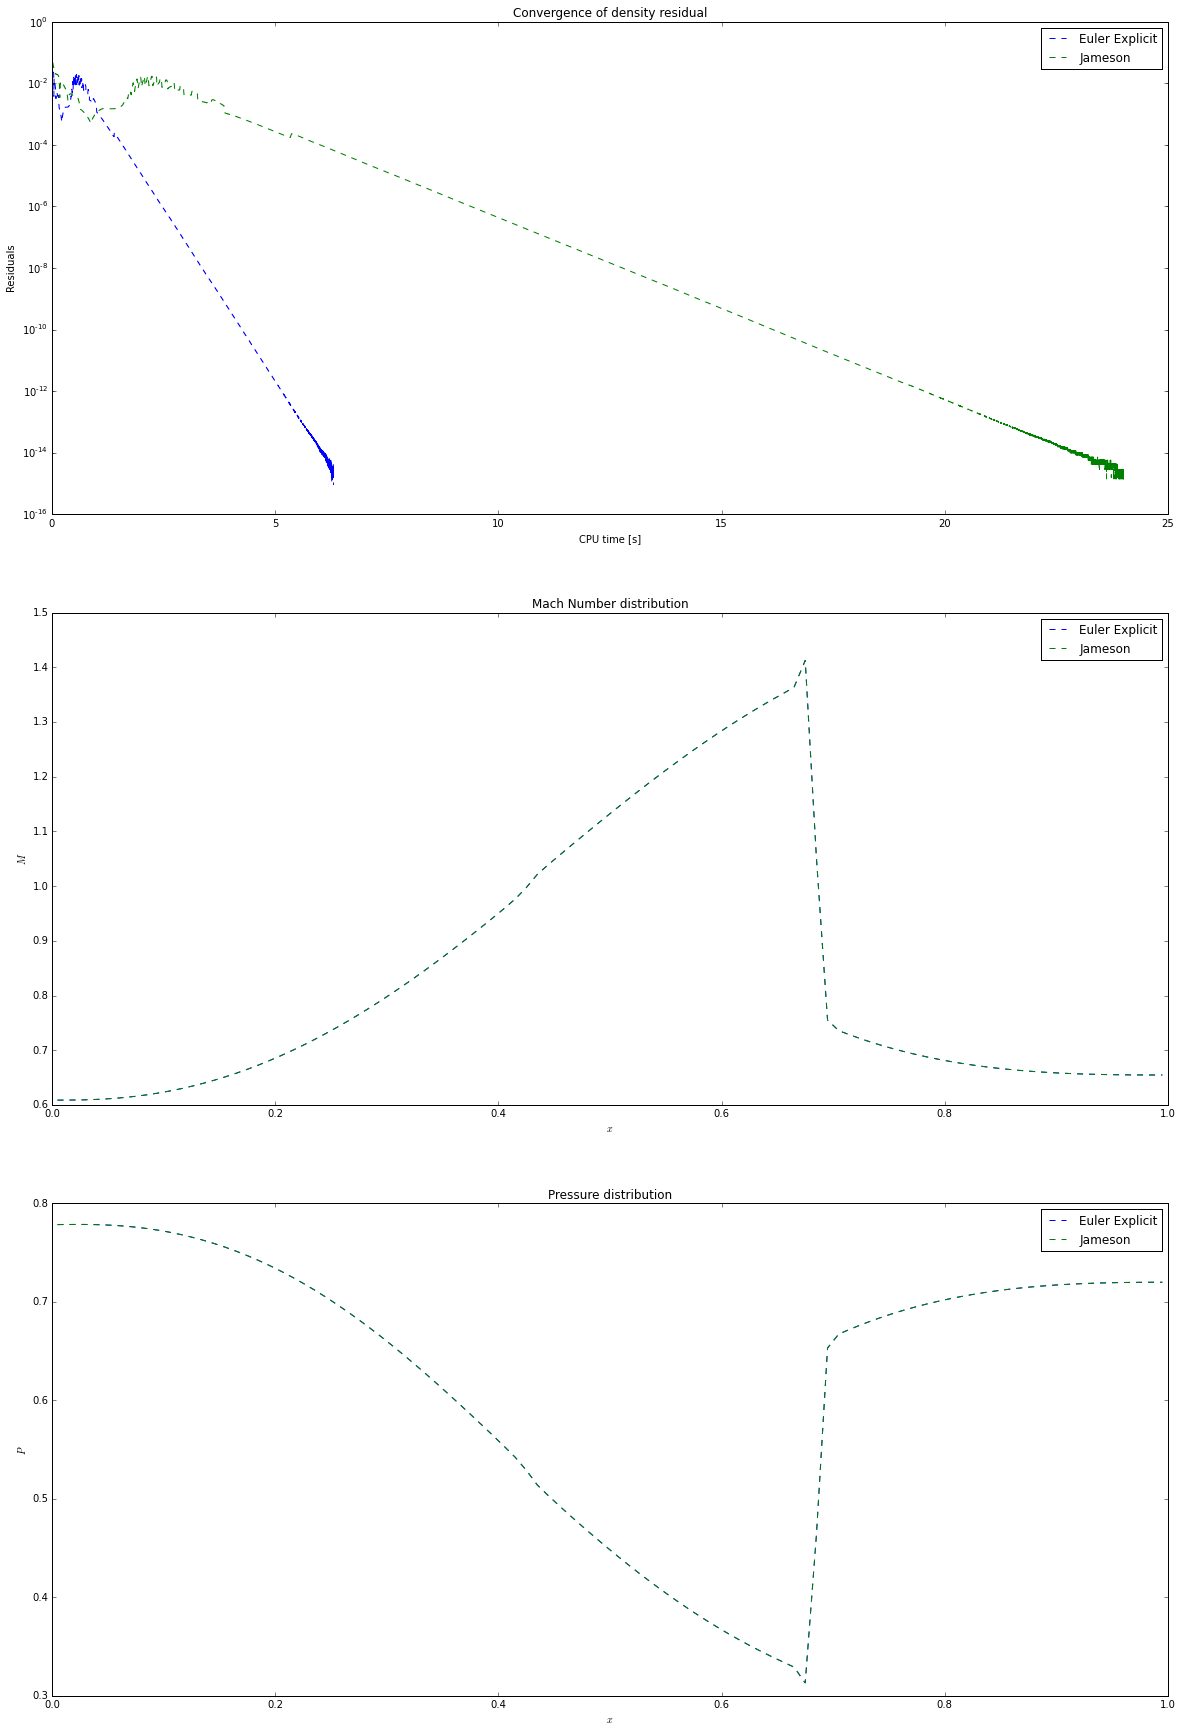

In [84]:
modify_param('flx_scheme', 4)
time_schemes = [
    (1, 'Euler Explicit'),
    (2, 'Jameson'),
]
opt = {'marker': None}
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20, 30))
results = []
for i, time_scheme in time_schemes:
    modify_param('timestep_scheme', i)
    run()
    state, resi, time = read_data()
    plot_residual_time(resi, time, ax1, label='%s' % time_scheme, **opt)
    plot_mach(state, ax2, label='%s' % time_scheme, **opt)
    plot_pressure(state, ax3, label='%s' % time_scheme, **opt)
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
plt.show()

Jameson's timestepping scheme takes almost 5 times as long, but both yield the exact same results in this case. 